In [1]:
import pandas as pd      
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [373]:
#pip list

In [ ]:
#pip install -r "requirements.txt"    #eğer requirements.txt den kuracaksak bu komutu kullanmalıyız. 

In [ ]:
#pip install streamlit==1.10.0

In [ ]:
#pip install scikit-learn==1.0.2

In [2]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print(" r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [3]:
df=pd.read_csv("without_outliers_autoscout.csv")
pd.set_option('display.max_columns',  None)
pd.options.display.float_format = '{:,.1f}'.format

In [4]:
df.head(1)

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,age,make_model
0,Sedans,"15,770.0",VAT deductible,"56,013.0",66.0,Used,2.0,0.0,Black,Metallic,Cloth,5.0,5.0,Automatic,1.5,3.0,"1,220.0",front,Diesel,99.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.0,Unknown,3.8,3.0,Audi A1


In [5]:
df.shape

(15918, 30)

In [6]:
df.isnull().sum().any()

False

In [7]:
df.columns

Index(['body_type', 'price_€', 'vat', 'km', 'hp_kW', 'type', 'previous_owners',
       'warranty', 'body_color', 'paint_type', 'upholstery', 'nr_of_doors',
       'nr_of_seats', 'gearing_type', 'engine_displacement_cc', 'cylinders',
       'weight_kg', 'drive_chain', 'fuel', 'co2e_g', 'emission_class',
       'comfort&convenience', 'entertainment&media', 'extras',
       'safety&security', 'gears', 'country_version', 'consumption_comb',
       'age', 'make_model'],
      dtype='object')

In [8]:
df.age.unique()

array([3., 2., 1., 0.])

In [9]:
df.hp_kW.min()

40.0

In [10]:
df.hp_kW.max()

294.0

In [11]:
df.km.nunique()

6698

In [12]:
df.km.max()

317000.0

In [13]:
df.km.min()

0.0

In [14]:
df.gearing_type.unique()

array(['Automatic', 'Manual', 'Semi-automatic'], dtype=object)

In [15]:
df.make_model.unique()

array(['Audi A1', 'Audi A3', 'Opel Astra', 'Opel Corsa', 'Opel Insignia',
       'Renault Clio', 'Renault Duster', 'Renault Espace'], dtype=object)

In [16]:
df.make_model.value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Name: make_model, dtype: int64

<AxesSubplot:>

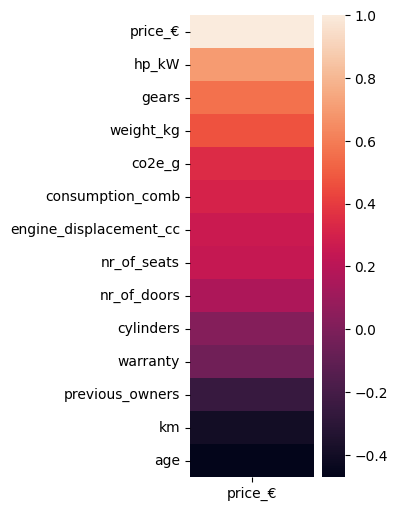

In [17]:
plt.figure(figsize=(2, 6))
sns.heatmap(df.corr()[["price_€"]].sort_values(by="price_€", ascending=False))


In [18]:
new_list=["age", "hp_kW", "km", "gearing_type", 'make_model']

In [19]:
X=df[new_list]
y=df['price_€']

In [20]:
X.sample(5)

,age,hp_kW,km,gearing_type,make_model
1507,1.0,66.0,"23,934.0",Manual,Audi A1
1203,2.0,85.0,"50,000.0",Manual,Audi A1
308,3.0,85.0,"46,000.0",Automatic,Audi A1
7634,0.0,147.0,"8,900.0",Automatic,Opel Astra
12986,0.0,81.0,17.0,Manual,Opel Insignia


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
from sklearn.compose import make_column_transformer

In [23]:
from sklearn.preprocessing import OrdinalEncoder

In [24]:
cat = X_train.select_dtypes("object").columns
cat

Index(['gearing_type', 'make_model'], dtype='object')

In [25]:
ord_enc = OrdinalEncoder()
column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough') # remainder: # Keep other columns rather than cat in original form.
                                                                                # remainder: # if you want to scale rest of cat columns use "minmax" istead passthroug
    
    # Apply ord_enc to categoric variables and remain in original form rest of them.
    # ord_enc for DT based algorithms
    # For Linear reg, log reg vs. use one hot encoder 

In [26]:
X_train=column_trans.fit_transform(X_train)

In [27]:
X_test=column_trans.transform(X_test)

In [28]:
X_train

array([[0.0000e+00, 0.0000e+00, 2.0000e+00, 7.0000e+01, 1.9800e+04],
       [0.0000e+00, 7.0000e+00, 2.0000e+00, 1.4700e+02, 4.9606e+04],
       [1.0000e+00, 5.0000e+00, 0.0000e+00, 5.6000e+01, 1.0000e+01],
       ...,
       [0.0000e+00, 3.0000e+00, 0.0000e+00, 6.6000e+01, 7.5000e+03],
       [0.0000e+00, 4.0000e+00, 3.0000e+00, 1.0000e+02, 1.7980e+05],
       [0.0000e+00, 1.0000e+00, 3.0000e+00, 8.1000e+01, 9.7000e+04]])

In [29]:
pd.Series(X_train[1])

0        0.0
1        7.0
2        2.0
3      147.0
4   49,606.0
dtype: float64

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [31]:
y_pred = rf_model.predict(X_test)

In [32]:
eval_metrics(y_test,y_pred)

 r2_score: 0.9251547271013696 
 mae: 1159.998214886486 
 mse: 3880608.77648034 
 rmse: 1969.926084014408


In [36]:
import pickle
pickle.dump(rf_model, open('rf_model_new', 'wb'))

In [37]:
pickle.dump(column_trans, open('transformer', 'wb'))

**deployment**

In [38]:
heagle_model = pickle.load(open('rf_model_new', 'rb'))

In [39]:
heagle_transformer = pickle.load(open('transformer', 'rb'))

In [40]:
columns=list(X.columns)
columns

['age', 'hp_kW', 'km', 'gearing_type', 'make_model']

In [41]:
my_dict = {
    "age": 2,
    "hp_kW": 105,
    "km": 100000,
    "gearing_type":"Automatic",
    "make_model": 'Audi A3'
}

In [415]:
#df = pd.DataFrame([my_dict])
#df = pd.DataFrame(my_dict, index=["a"])

In [42]:
df = pd.DataFrame.from_dict([my_dict])

In [43]:
df.head()

,age,hp_kW,km,gearing_type,make_model
0,2,105,100000,Automatic,Audi A3


In [44]:
df2 = heagle_transformer.transform(df)

In [45]:
pd.Series(df2[0])

0         0.0
1         1.0
2         2.0
3       105.0
4   100,000.0
dtype: float64

In [46]:
prediction = heagle_model.predict(df2)
print(prediction)

[19254.2]


In [47]:
print("The estimated price of your car is €{}. ".format(int(prediction[0])))

The estimated price of your car is €19254. 
